## Problem Statement : 

### Will a start-up succeed or fail?
#### Business problem:
Investment strategies for investing in start-up companies are widely based on intuition or past experience. As a result, investors rely primarily on the need being addressed, background of the founders, size of the market being addressed and the ability of the company to scale after tasting early success. The question we pose here is, “can we perform some rigorous analysis that can be used to identify relevant factors and score prospective start- ups based on their potential to be successful”. This model/ analysis will then allow investors to make more informed decisions and rely less on their intuitions.

You would need to build a logistic regression model (only) to predict whether a start-up will succeed or fail. Furthermore, you would need to focus on the data preparation and exploration part. Before any modeling algorithm can be applied the given data needs to be cleaned and explored to make the data fit for analysis and select features for modeling

In [1]:
# Import all the important libraries
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

### Load the files

In [2]:
train_data = pd.read_csv(r'C:\Users\sadiq\Documents\Acquire_internship\trainData.csv')
test_data = pd.read_csv(r'C:\Users\sadiq\Documents\Acquire_internship\testData.csv')


### Explore the train & test data

In [3]:
train_data.head()

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,...,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company2,1,USA,No,Few,Yes,5,0,2,0,...,9.000000,Yes,No,No,2,Product,No,Management,Medium,Yes
1,Company3,1,USA,No,Few,No,15,0,3,0,...,7.344444,No,No,No,1,Both,Yes,Science,Medium,Yes
2,Company5,1,USA,No,Few,No,7,0,1,1,...,9.822222,No,No,No,0,Product,No,Technology,Medium,Yes
3,Company6,1,USA,No,Few,No,2,0,4,0,...,9.322222,No,No,No,0,Service,No,Science,Medium,Yes
4,Company8,1,USA,No,Few,No,0,0,3,4,...,6.400000,No,No,No,2,Both,No,Management,Medium,No


In [4]:
test_data.head()

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,...,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company1,NaN,USA,No,single,No,2,0,1,2,...,11.560000,No,No,No,0,Service,Yes,Management,Low,No
1,Company4,NaN,USA,No,Few,No,6,0,2,0,...,8.700000,Yes,No,No,0,Product,Yes,Technology,Medium,Yes
2,Company7,NaN,USA,No,single,No,7,0,2,9,...,7.311111,No,No,No,1,Both,Yes,Technology,Medium,No
3,Company10,NaN,USA,No,Few,No,0,0,3,4,...,5.000000,No,No,No,1,Product,No,Science,High,No
4,Company12,NaN,USA,No,Few,No,0,1,0,1,...,3.850000,No,No,No,0,Product,No,Science,Medium,Yes


In [5]:
train_final = train_data.drop('CAX_ID',1)
test_final = test_data.drop(['CAX_ID','Dependent'],1)
print(train_final.shape)
print(test_final.shape)

(234, 50)
(80, 49)


### Statistically describe the data

In [6]:
print(train_final.describe())
print('=======================================================')
print(test_final.describe())

        Dependent  Company_investor_count_seed  \
count  234.000000                   234.000000   
mean     0.495726                     1.448718   
std      0.501054                     2.737347   
min      0.000000                     0.000000   
25%      0.000000                     0.000000   
50%      0.000000                     0.000000   
75%      1.000000                     2.000000   
max      1.000000                    17.000000   

       Company_investor_count_Angel_VC  Company_cofounders_count  \
count                       234.000000                234.000000   
mean                          0.777778                  2.072650   
std                           1.663086                  1.160444   
min                           0.000000                  0.000000   
25%                           0.000000                  1.000000   
50%                           0.000000                  2.000000   
75%                           1.000000                  3.000000   
max  

#### Check for null values in train as well as test dataset

In [7]:
train_final.isnull().sum()

Dependent                                   0
Company_Location                            0
Company_raising_fund                        0
Company_Industry_count                      0
Company_mobile_app                          0
Company_investor_count_seed                 0
Company_investor_count_Angel_VC             0
Company_cofounders_count                    0
Company_advisors_count                      0
Company_senior_team_count                   0
Company_top_Angel_VC_funding                0
Company_repeat_investors_count              0
Founders_top_company_experience             0
Founders_previous_company_employee_count    0
Founders_startup_experience                 0
Founders_big_5_experience                   0
Company_business_model                      0
Founders_experience                         0
Founders_global_exposure                    0
Founders_Industry_exposure                  0
Founder_education                           0
Founder_university_quality        

In [8]:
test_final.isnull().sum()

Company_Location                            0
Company_raising_fund                        0
Company_Industry_count                      0
Company_mobile_app                          0
Company_investor_count_seed                 0
Company_investor_count_Angel_VC             0
Company_cofounders_count                    0
Company_advisors_count                      0
Company_senior_team_count                   0
Company_top_Angel_VC_funding                0
Company_repeat_investors_count              0
Founders_top_company_experience             0
Founders_previous_company_employee_count    0
Founders_startup_experience                 0
Founders_big_5_experience                   0
Company_business_model                      0
Founders_experience                         0
Founders_global_exposure                    0
Founders_Industry_exposure                  0
Founder_education                           0
Founder_university_quality                  0
Founders_Popularity               

##### there are no insignificant null values in both train as well as test data

### Split the data into categorical & numeric data for further Analysis ( EDA & Feature Engg.)

In [9]:
dataframe_con = train_final.select_dtypes(include=np.number)
dataframe_cat = train_final.select_dtypes(exclude=np.number)

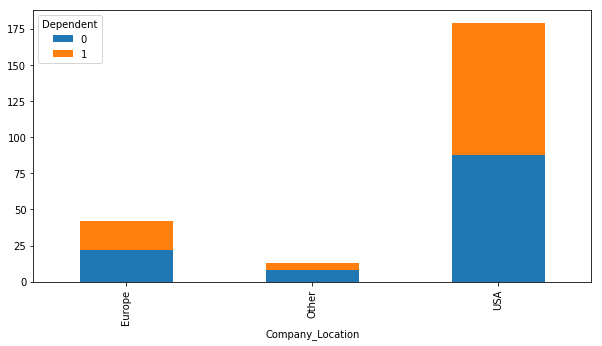

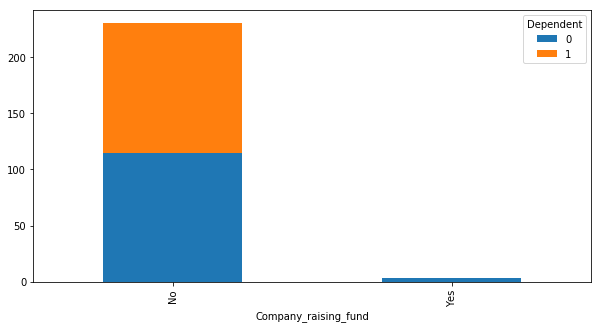

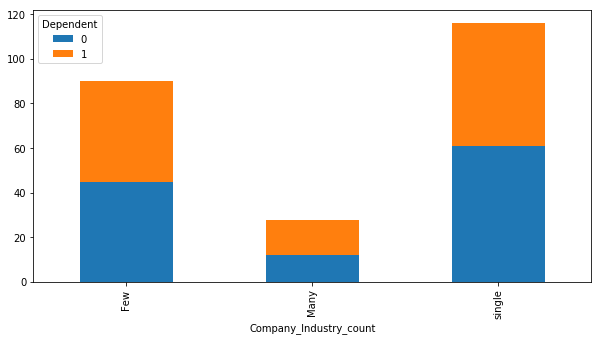

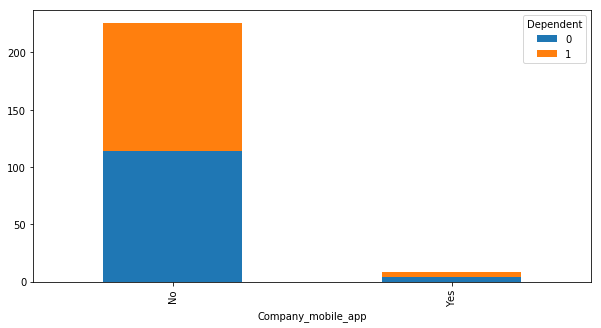

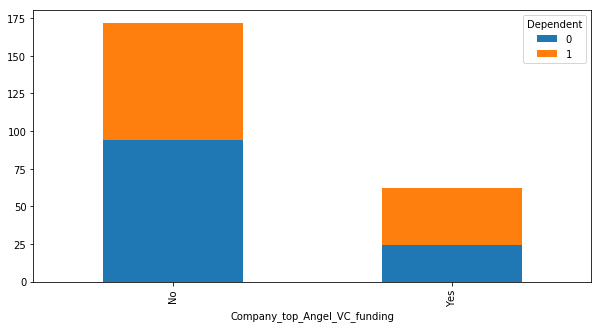

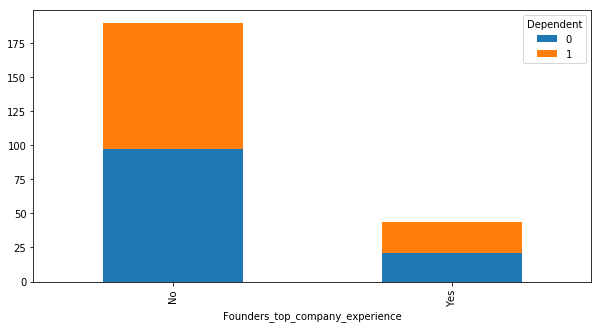

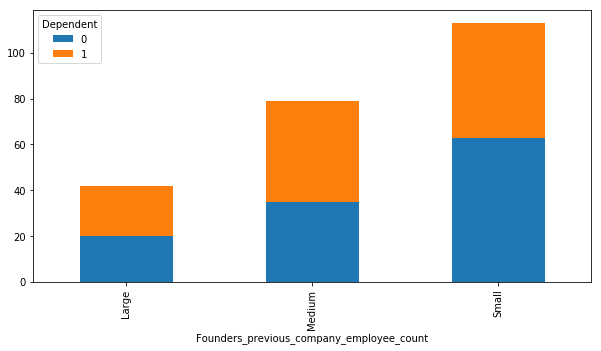

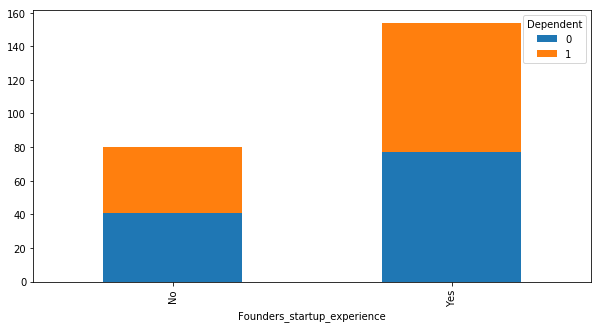

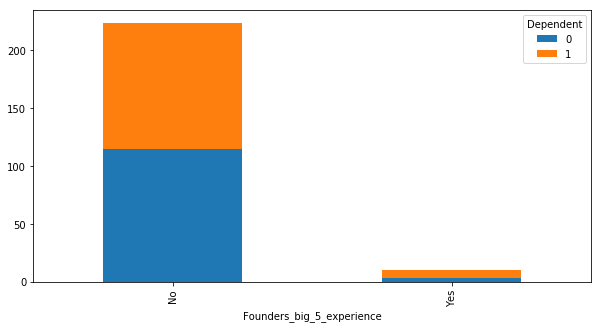

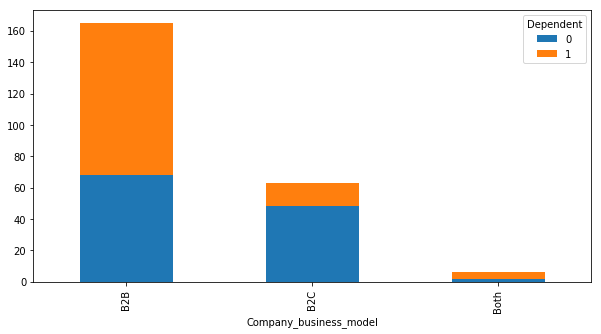

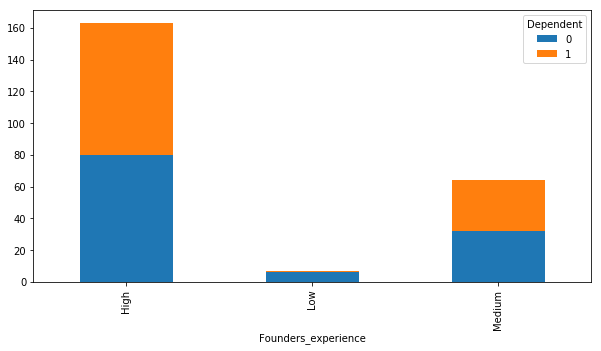

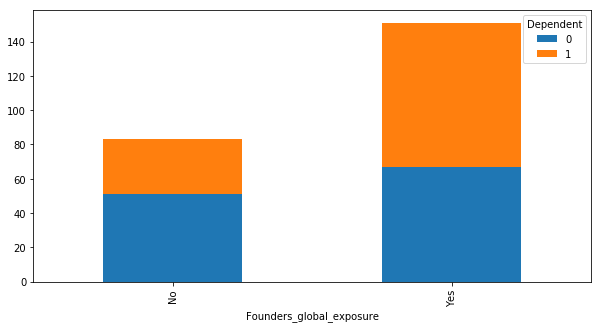

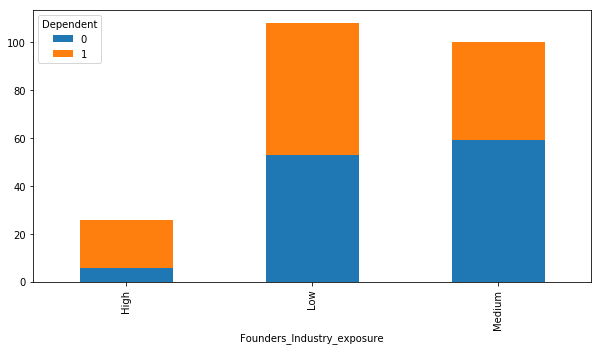

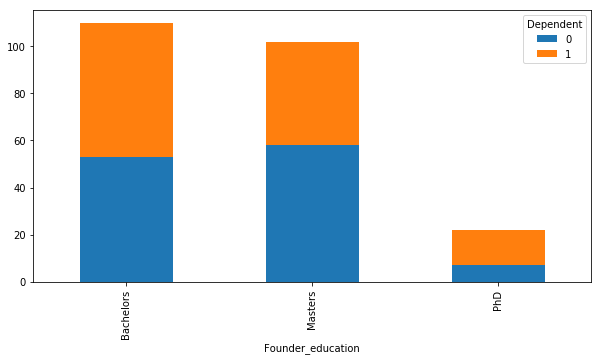

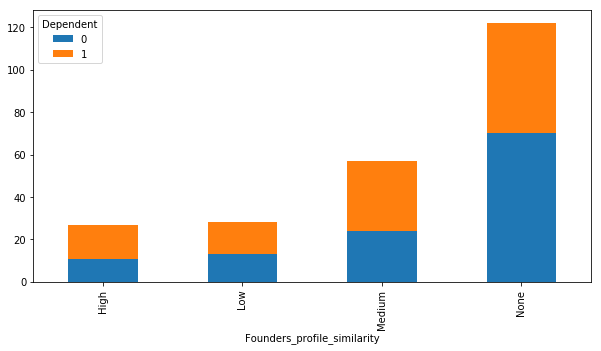

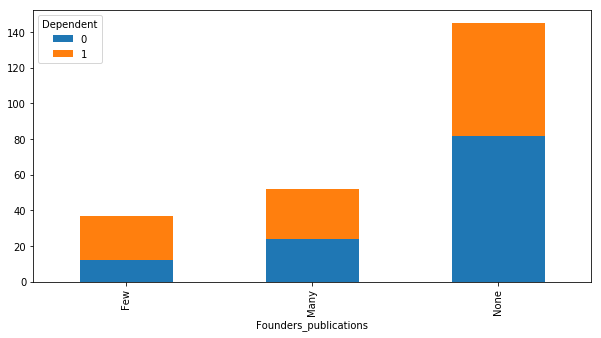

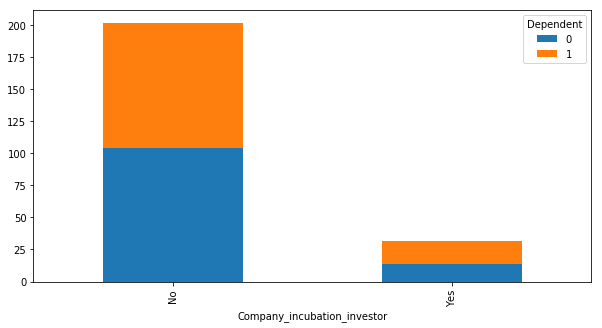

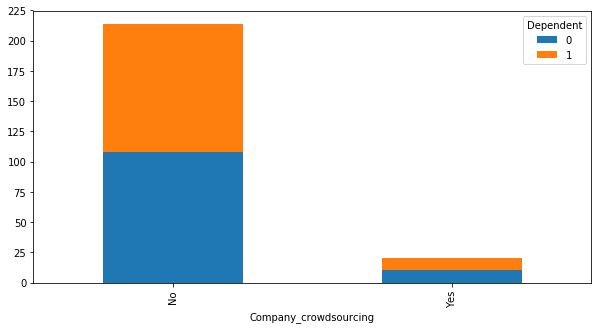

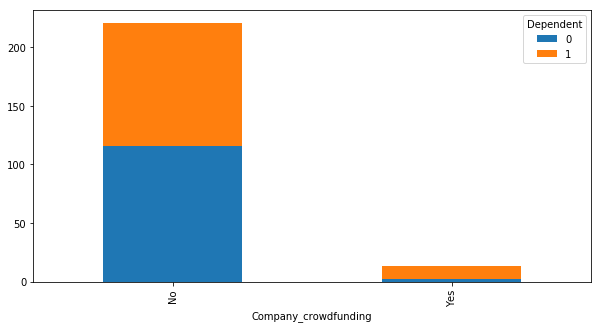

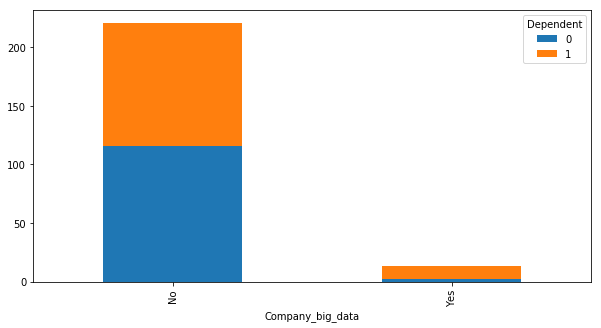

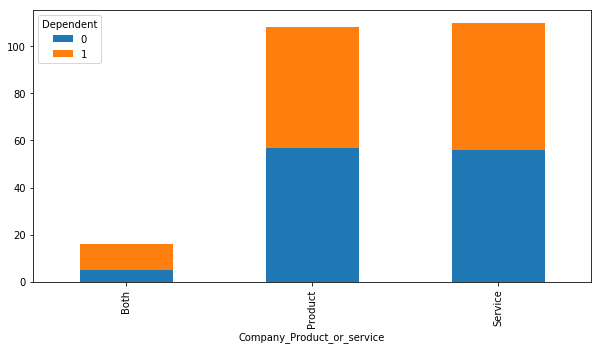

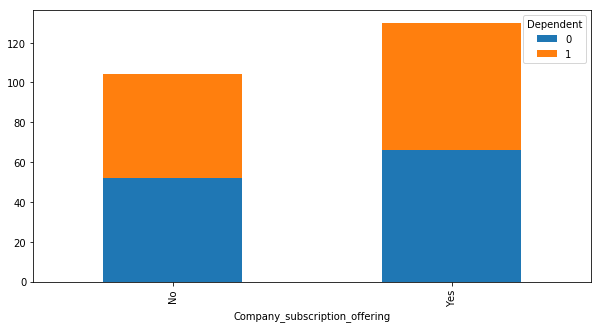

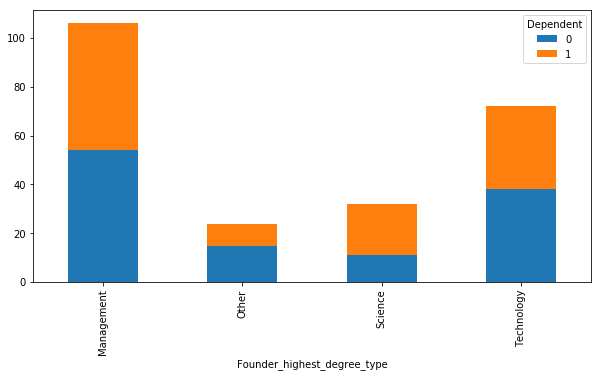

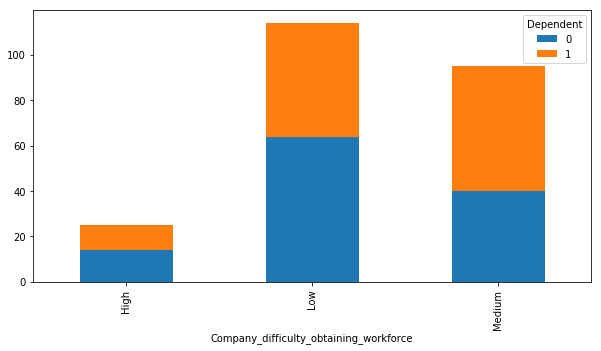

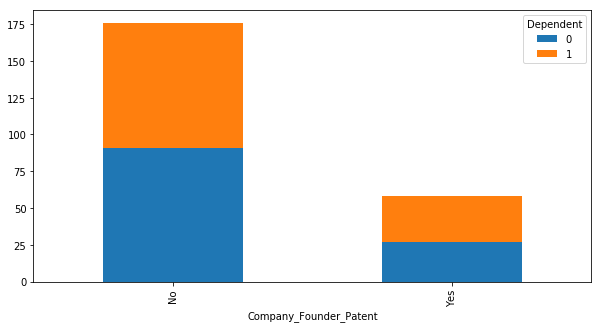

In [10]:
for i in dataframe_cat:
    train_data.groupby(i)['Dependent'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(10,5))

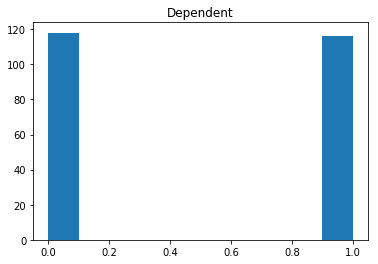

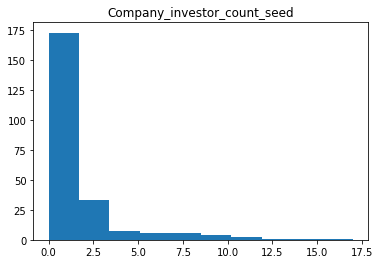

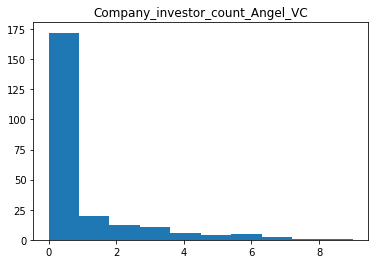

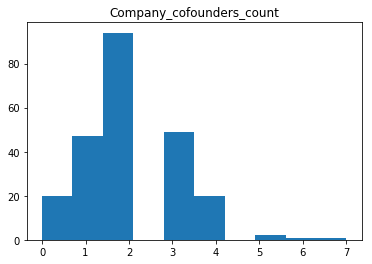

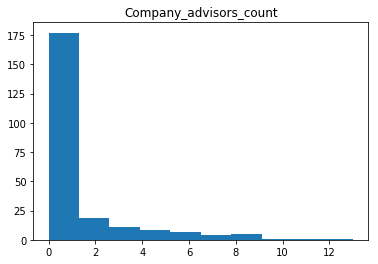

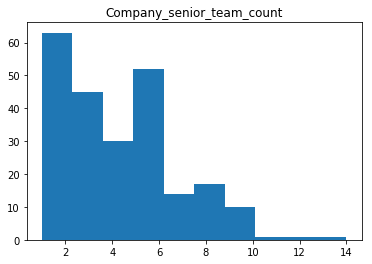

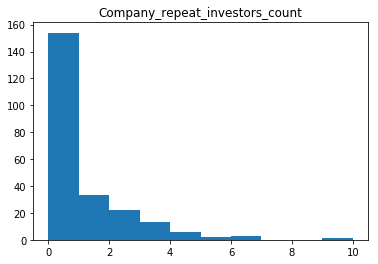

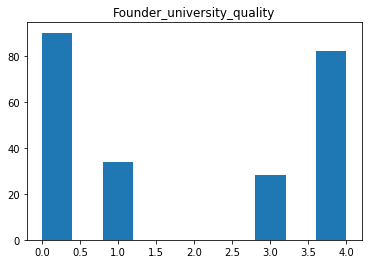

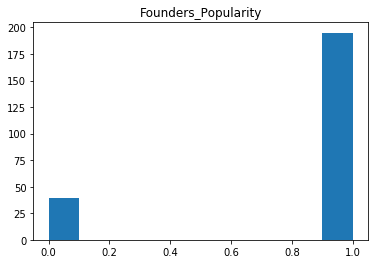

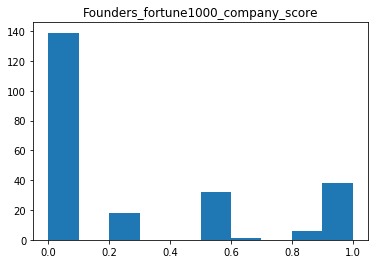

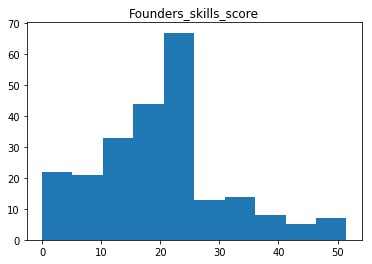

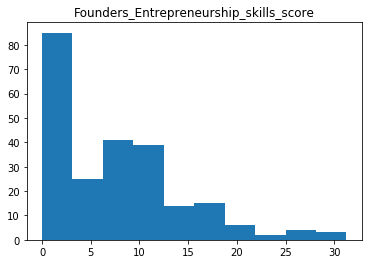

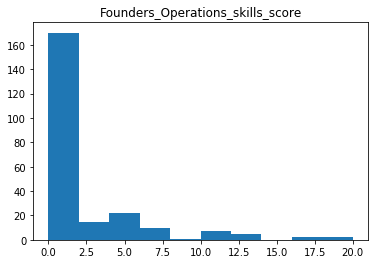

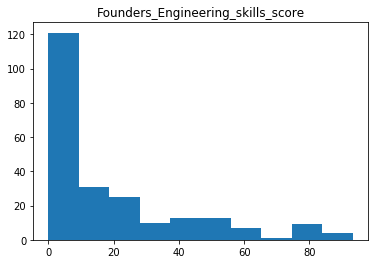

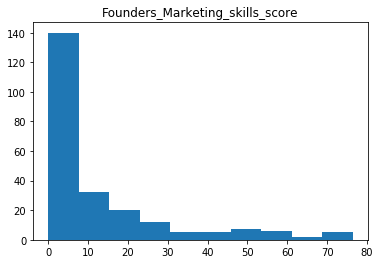

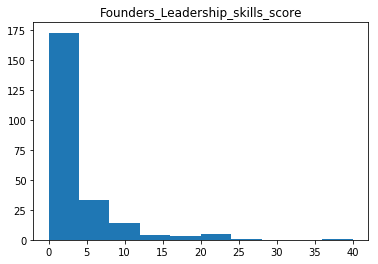

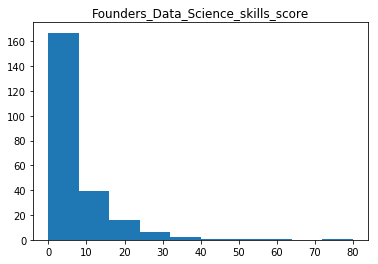

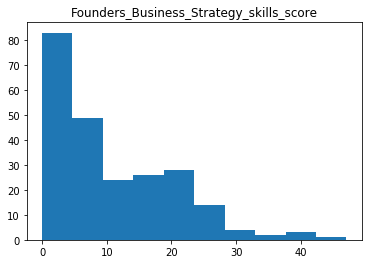

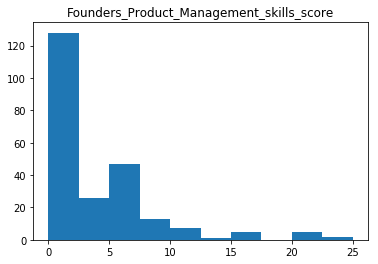

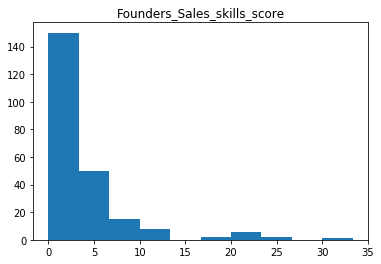

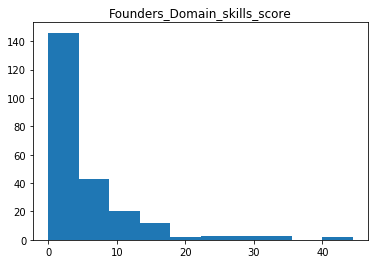

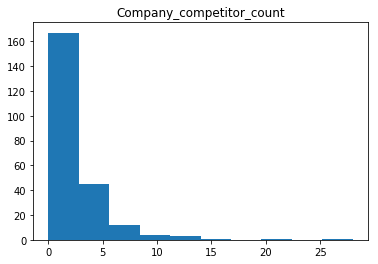

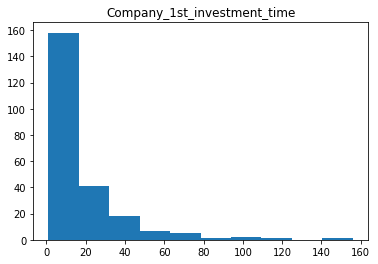

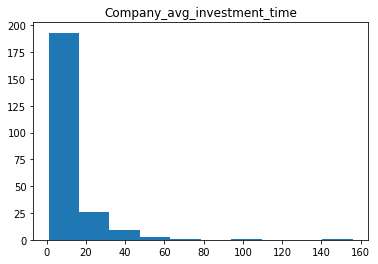

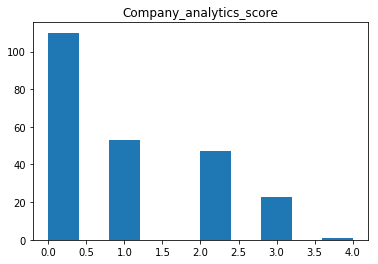

In [11]:
for i in dataframe_con:
    plt.title(i)
    plt.hist(dataframe_con[i])
    plt.show()

### After visualization of each categorical feature separtely majority of values in 'Company_investor_count_Angel_VC' , 'Company_advisors_count' and 'Company_avg_investment_time' are zeros. So remove the columns


In [12]:
dataframe_con.drop(['Company_investor_count_Angel_VC','Company_advisors_count','Company_avg_investment_time'],1,inplace=True)

### Check for skewness in the continuous data

In [13]:
skewness = pd.DataFrame(data={'name':list(dataframe_con),'skew':skew(dataframe_con)})
skewness

,name,skew
0,Dependent,0.017095
1,Company_investor_count_seed,2.842525
2,Company_cofounders_count,0.485858
3,Company_senior_team_count,0.814256
4,Company_repeat_investors_count,2.660687
5,Founder_university_quality,0.105559
6,Founders_Popularity,-1.788854
7,Founders_fortune1000_company_score,1.013264
8,Founders_skills_score,0.428138
9,Founders_Entrepreneurship_skills_score,0.884527


### Remove the skewness using a log transform 

In [14]:
col = ['Company_investor_count_seed','Company_repeat_investors_count','Founders_Operations_skills_score','Founders_Leadership_skills_score','Founders_Data_Science_skills_score','Founders_Sales_skills_score','Founders_Sales_skills_score','Company_competitor_count','Company_1st_investment_time']
dataframe_con[col] = np.log1p(dataframe_con[col])



In [15]:
skewness = pd.DataFrame(data={'name':list(dataframe_con),'skew':skew(dataframe_con)})
skewness

,name,skew
0,Dependent,0.017095
1,Company_investor_count_seed,1.204139
2,Company_cofounders_count,0.485858
3,Company_senior_team_count,0.814256
4,Company_repeat_investors_count,1.256134
5,Founder_university_quality,0.105559
6,Founders_Popularity,-1.788854
7,Founders_fortune1000_company_score,1.013264
8,Founders_skills_score,0.428138
9,Founders_Entrepreneurship_skills_score,0.884527


### Label Encode all the categorical variables

In [16]:
le = LabelEncoder()
for col in dataframe_cat:
    dataframe_cat[col] = le.fit_transform(dataframe_cat[col])
     

dataframe_cat.head()

,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_top_Angel_VC_funding,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,...,Founders_publications,Company_incubation_investor,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,2,0,0,1,0,1,0,1,0,1,...,2,0,1,0,0,1,0,0,2,1
1,2,0,0,0,0,1,1,0,0,0,...,2,1,0,0,0,0,1,2,2,1
2,2,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,1,0,3,2,1
3,2,0,0,0,0,0,1,0,0,2,...,2,1,0,0,0,2,0,2,2,1
4,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,0


In [17]:
new_dataframe = pd.concat([dataframe_con,dataframe_cat],axis=1,ignore_index=True)

In [18]:
new_dataframe.shape

(234, 47)

In [19]:
new_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1,1.791759,2,4,0.000000,4,1,0.0,34.0,15.882353,...,2,0,1,0,0,1,0,0,2,1
1,1,2.772589,3,7,0.000000,1,1,0.2,36.0,9.401709,...,2,1,0,0,0,0,1,2,2,1
2,1,2.079442,1,8,0.000000,0,1,0.0,23.0,0.000000,...,0,0,0,0,0,1,0,3,2,1
3,1,1.098612,4,4,1.098612,0,1,0.0,25.0,6.250000,...,2,1,0,0,0,2,0,2,2,1
4,1,0.000000,3,4,0.000000,4,1,0.0,4.5,0.000000,...,0,0,0,0,0,0,0,0,2,0


In [20]:
dataframe_con.columns

Index(['Dependent', 'Company_investor_count_seed', 'Company_cofounders_count',
       'Company_senior_team_count', 'Company_repeat_investors_count',
       'Founder_university_quality', 'Founders_Popularity',
       'Founders_fortune1000_company_score', 'Founders_skills_score',
       'Founders_Entrepreneurship_skills_score',
       'Founders_Operations_skills_score', 'Founders_Engineering_skills_score',
       'Founders_Marketing_skills_score', 'Founders_Leadership_skills_score',
       'Founders_Data_Science_skills_score',
       'Founders_Business_Strategy_skills_score',
       'Founders_Product_Management_skills_score',
       'Founders_Sales_skills_score', 'Founders_Domain_skills_score',
       'Company_competitor_count', 'Company_1st_investment_time',
       'Company_analytics_score'],
      dtype='object')

In [21]:
dataframe_cat.columns

Index(['Company_Location', 'Company_raising_fund', 'Company_Industry_count',
       'Company_mobile_app', 'Company_top_Angel_VC_funding',
       'Founders_top_company_experience',
       'Founders_previous_company_employee_count',
       'Founders_startup_experience', 'Founders_big_5_experience',
       'Company_business_model', 'Founders_experience',
       'Founders_global_exposure', 'Founders_Industry_exposure',
       'Founder_education', 'Founders_profile_similarity',
       'Founders_publications', 'Company_incubation_investor',
       'Company_crowdsourcing', 'Company_crowdfunding', 'Company_big_data',
       'Company_Product_or_service', 'Company_subscription_offering',
       'Founder_highest_degree_type', 'Company_difficulty_obtaining_workforce',
       'Company_Founder_Patent'],
      dtype='object')

In [22]:
new_dataframe.columns = ['Dependent', 'Company_investor_count_seed', 'Company_cofounders_count',
       'Company_senior_team_count', 'Company_repeat_investors_count',
       'Founder_university_quality', 'Founders_Popularity',
       'Founders_fortune1000_company_score', 'Founders_skills_score',
       'Founders_Entrepreneurship_skills_score',
       'Founders_Operations_skills_score', 'Founders_Engineering_skills_score',
       'Founders_Marketing_skills_score', 'Founders_Leadership_skills_score',
       'Founders_Data_Science_skills_score',
       'Founders_Business_Strategy_skills_score',
       'Founders_Product_Management_skills_score',
       'Founders_Sales_skills_score', 'Founders_Domain_skills_score',
       'Company_competitor_count', 'Company_1st_investment_time',
       'Company_analytics_score','Company_Location', 'Company_raising_fund', 'Company_Industry_count',
       'Company_mobile_app', 'Company_top_Angel_VC_funding',
       'Founders_top_company_experience',
       'Founders_previous_company_employee_count',
       'Founders_startup_experience', 'Founders_big_5_experience',
       'Company_business_model', 'Founders_experience',
       'Founders_global_exposure', 'Founders_Industry_exposure',
       'Founder_education', 'Founders_profile_similarity',
       'Founders_publications', 'Company_incubation_investor',
       'Company_crowdsourcing', 'Company_crowdfunding', 'Company_big_data',
       'Company_Product_or_service', 'Company_subscription_offering',
       'Founder_highest_degree_type', 'Company_difficulty_obtaining_workforce',
       'Company_Founder_Patent']

In [23]:
new_dataframe.head()

,Dependent,Company_investor_count_seed,Company_cofounders_count,Company_senior_team_count,Company_repeat_investors_count,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_skills_score,Founders_Entrepreneurship_skills_score,...,Founders_publications,Company_incubation_investor,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,1,1.791759,2,4,0.000000,4,1,0.0,34.0,15.882353,...,2,0,1,0,0,1,0,0,2,1
1,1,2.772589,3,7,0.000000,1,1,0.2,36.0,9.401709,...,2,1,0,0,0,0,1,2,2,1
2,1,2.079442,1,8,0.000000,0,1,0.0,23.0,0.000000,...,0,0,0,0,0,1,0,3,2,1
3,1,1.098612,4,4,1.098612,0,1,0.0,25.0,6.250000,...,2,1,0,0,0,2,0,2,2,1
4,1,0.000000,3,4,0.000000,4,1,0.0,4.5,0.000000,...,0,0,0,0,0,0,0,0,2,0


In [24]:
columns = list(new_dataframe)
new_dataframe = new_dataframe[columns]

In [25]:
new_dataframe.head()

,Dependent,Company_investor_count_seed,Company_cofounders_count,Company_senior_team_count,Company_repeat_investors_count,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_skills_score,Founders_Entrepreneurship_skills_score,...,Founders_publications,Company_incubation_investor,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,1,1.791759,2,4,0.000000,4,1,0.0,34.0,15.882353,...,2,0,1,0,0,1,0,0,2,1
1,1,2.772589,3,7,0.000000,1,1,0.2,36.0,9.401709,...,2,1,0,0,0,0,1,2,2,1
2,1,2.079442,1,8,0.000000,0,1,0.0,23.0,0.000000,...,0,0,0,0,0,1,0,3,2,1
3,1,1.098612,4,4,1.098612,0,1,0.0,25.0,6.250000,...,2,1,0,0,0,2,0,2,2,1
4,1,0.000000,3,4,0.000000,4,1,0.0,4.5,0.000000,...,0,0,0,0,0,0,0,0,2,0


In [26]:
X = new_dataframe.drop('Dependent',1)
y = new_dataframe['Dependent']
ss = StandardScaler()
X_ = ss.fit_transform(X)
#convert array into dataframe
X_std_final = pd.DataFrame(X,columns=columns[1:])
X_std_final.head()

,Company_investor_count_seed,Company_cofounders_count,Company_senior_team_count,Company_repeat_investors_count,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,...,Founders_publications,Company_incubation_investor,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,1.791759,2,4,0.000000,4,1,0.0,34.0,15.882353,2.546684,...,2,0,1,0,0,1,0,0,2,1
1,2.772589,3,7,0.000000,1,1,0.2,36.0,9.401709,0.000000,...,2,1,0,0,0,0,1,2,2,1
2,2.079442,1,8,0.000000,0,1,0.0,23.0,0.000000,0.000000,...,0,0,0,0,0,1,0,3,2,1
3,1.098612,4,4,1.098612,0,1,0.0,25.0,6.250000,0.000000,...,2,1,0,0,0,2,0,2,2,1
4,0.000000,3,4,0.000000,4,1,0.0,4.5,0.000000,0.000000,...,0,0,0,0,0,0,0,0,2,0


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X_std_final,y,random_state=42,test_size=0.2)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("AUC on test data:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("=="*20)
print("Classification Report: \n",classification_report(y_test,y_pred))

AUC on test data: 0.6100000000000001
Confusion Matrix: 
 [[18  7]
 [11 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.72      0.67        25
           1       0.61      0.50      0.55        22

    accuracy                           0.62        47
   macro avg       0.62      0.61      0.61        47
weighted avg       0.62      0.62      0.61        47



C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Perform hyperparameter tuning using GridSearch

In [28]:
params = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100]}
grid_search = GridSearchCV(estimator=logreg, param_grid=params,scoring='f1',cv=10)
grid_search.fit(X_train,y_train)
y_pred_grid_search = grid_search.predict(X_test)
print('BEST PARAM : ', grid_search.best_params_)
print("=="*20)
print("AUC on test data:", roc_auc_score(y_test, y_pred_grid_search))
print("=="*20)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_grid_search))
print("=="*20)
print("Classification Report: \n",classification_report(y_test,y_pred_grid_search))

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

BEST PARAM :  {'C': 0.1, 'penalty': 'l2'}
AUC on test data: 0.5927272727272728
Confusion Matrix: 
 [[16  9]
 [10 12]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.64      0.63        25
           1       0.57      0.55      0.56        22

    accuracy                           0.60        47
   macro avg       0.59      0.59      0.59        47
weighted avg       0.59      0.60      0.60        47



C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

In [29]:
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Dependent'])
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(os_data_X,os_data_y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.656043 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.630994 (0.095590) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.625244 (0.092698) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.629142 (0.098601) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.634211 (0.094224) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.625049 (0.104201) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.634211 (0.095531) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.639376 (0.106788) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.639279 (0.121806) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.642885 (0.116597) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.655848 (0.100680) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.645322 (0.090199) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.638207 (0.100041) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.656043 (0.096846) wi

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
y_pred = grid_search.predict(X_test)
print("AUC on test data:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("=="*20)
print("Classification Report: \n",classification_report(y_test,y_pred))

AUC on test data: 0.6127272727272727
Confusion Matrix: 
 [[17  8]
 [10 12]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.68      0.65        25
           1       0.60      0.55      0.57        22

    accuracy                           0.62        47
   macro avg       0.61      0.61      0.61        47
weighted avg       0.62      0.62      0.62        47



In [31]:
nof_list=[20,25,30,35,40,50,55]
high_score=0
nof=0

for n in nof_list:
    test = SelectKBest(score_func=f_classif , k= 'all' )
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    model = LogisticRegression()
    model.fit(X_train,y_train)
    print("For no of features=",n,", score=", model.score(X_test,y_test))

    if model.score(X_test,y_test)>high_score:
        high_score=model.score(X_test,y_test)
        nof=n 
print("High Score is:",high_score, "with features=",nof)
# Calculate accuracy , print out the Confusion Matrix 
y_pred = model.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

For no of features= 20 , score= 0.6170212765957447
For no of features= 25 , score= 0.6170212765957447
For no of features= 30 , score= 0.6170212765957447
For no of features= 35 , score= 0.6170212765957447
For no of features= 40 , score= 0.6170212765957447
For no of features= 50 , score= 0.6170212765957447
For no of features= 55 , score= 0.6170212765957447
High Score is: 0.6170212765957447 with features= 20
Confusion Matrix: 
 [[18  7]
 [11 11]]


C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

In [32]:

print("AUC on test data:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("=="*20)
print("Classification Report: \n",classification_report(y_test,y_pred))

AUC on test data: 0.6100000000000001
Confusion Matrix: 
 [[18  7]
 [11 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.72      0.67        25
           1       0.61      0.50      0.55        22

    accuracy                           0.62        47
   macro avg       0.62      0.61      0.61        47
weighted avg       0.62      0.62      0.61        47



In [33]:

pca = PCA(n_components=20,random_state=0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model = LogisticRegression()
model.fit(X_train_pca,y_train)
#print('model score : ', pca_score = model.score(X_test_pca,y_test))
y_pred = model.predict(X_test_pca)
print("AUC on test data:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("=="*20)
print("Classification Report: \n",classification_report(y_test,y_pred))

AUC on test data: 0.5472727272727272
Confusion Matrix: 
 [[16  9]
 [12 10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.64      0.60        25
           1       0.53      0.45      0.49        22

    accuracy                           0.55        47
   macro avg       0.55      0.55      0.55        47
weighted avg       0.55      0.55      0.55        47



### OneHot Encoding on categorical features

In [34]:
cat_data = train_final.select_dtypes(exclude=np.number)
cat_data.head()

,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_top_Angel_VC_funding,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,...,Founders_publications,Company_incubation_investor,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,USA,No,Few,Yes,No,Yes,Large,Yes,No,B2C,...,None,No,Yes,No,No,Product,No,Management,Medium,Yes
1,USA,No,Few,No,No,Yes,Medium,No,No,B2B,...,None,Yes,No,No,No,Both,Yes,Science,Medium,Yes
2,USA,No,Few,No,No,No,Small,No,No,B2B,...,Few,No,No,No,No,Product,No,Technology,Medium,Yes
3,USA,No,Few,No,No,No,Medium,No,No,Both,...,None,Yes,No,No,No,Service,No,Science,Medium,Yes
4,USA,No,Few,No,No,No,Large,Yes,No,B2B,...,Few,No,No,No,No,Both,No,Management,Medium,No


In [35]:
dummy_data = pd.get_dummies(data=cat_data, columns=cat_data.columns)
dummy_data.head()

,Company_Location_Europe,Company_Location_Other,Company_Location_USA,Company_raising_fund_No,Company_raising_fund_Yes,Company_Industry_count_Few,Company_Industry_count_Many,Company_Industry_count_single,Company_mobile_app_No,Company_mobile_app_Yes,...,Company_subscription_offering_Yes,Founder_highest_degree_type_Management,Founder_highest_degree_type_Other,Founder_highest_degree_type_Science,Founder_highest_degree_type_Technology,Company_difficulty_obtaining_workforce_High,Company_difficulty_obtaining_workforce_Low,Company_difficulty_obtaining_workforce_Medium,Company_Founder_Patent_No,Company_Founder_Patent_Yes
0,0,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
1,0,0,1,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,1
2,0,0,1,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
3,0,0,1,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
4,0,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [36]:
df_final = pd.concat([dataframe_con,dummy_data],axis=1,ignore_index=True)

In [37]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1,1.791759,2,4,0.000000,4,1,0.0,34.0,15.882353,...,0,1,0,0,0,0,0,1,0,1
1,1,2.772589,3,7,0.000000,1,1,0.2,36.0,9.401709,...,1,0,0,1,0,0,0,1,0,1
2,1,2.079442,1,8,0.000000,0,1,0.0,23.0,0.000000,...,0,0,0,0,1,0,0,1,0,1
3,1,1.098612,4,4,1.098612,0,1,0.0,25.0,6.250000,...,0,0,0,1,0,0,0,1,0,1
4,1,0.000000,3,4,0.000000,4,1,0.0,4.5,0.000000,...,0,1,0,0,0,0,0,1,1,0


In [38]:
dummy_data.columns

Index(['Company_Location_Europe', 'Company_Location_Other',
       'Company_Location_USA', 'Company_raising_fund_No',
       'Company_raising_fund_Yes', 'Company_Industry_count_Few',
       'Company_Industry_count_Many', 'Company_Industry_count_single',
       'Company_mobile_app_No', 'Company_mobile_app_Yes',
       'Company_top_Angel_VC_funding_No', 'Company_top_Angel_VC_funding_Yes',
       'Founders_top_company_experience_No',
       'Founders_top_company_experience_Yes',
       'Founders_previous_company_employee_count_Large',
       'Founders_previous_company_employee_count_Medium',
       'Founders_previous_company_employee_count_Small',
       'Founders_startup_experience_No', 'Founders_startup_experience_Yes',
       'Founders_big_5_experience_No', 'Founders_big_5_experience_Yes',
       'Company_business_model_B2B', 'Company_business_model_B2C',
       'Company_business_model_Both', 'Founders_experience_High',
       'Founders_experience_Low', 'Founders_experience_Medium',
  

In [39]:
df_final.columns = ['Dependent', 'Company_investor_count_seed', 'Company_cofounders_count',
       'Company_senior_team_count', 'Company_repeat_investors_count',
       'Founder_university_quality', 'Founders_Popularity',
       'Founders_fortune1000_company_score', 'Founders_skills_score',
       'Founders_Entrepreneurship_skills_score',
       'Founders_Operations_skills_score', 'Founders_Engineering_skills_score',
       'Founders_Marketing_skills_score', 'Founders_Leadership_skills_score',
       'Founders_Data_Science_skills_score',
       'Founders_Business_Strategy_skills_score',
       'Founders_Product_Management_skills_score',
       'Founders_Sales_skills_score', 'Founders_Domain_skills_score',
       'Company_competitor_count', 'Company_1st_investment_time',
       'Company_analytics_score','Company_Location_Europe', 'Company_Location_Other',
       'Company_Location_USA', 'Company_raising_fund_No',
       'Company_raising_fund_Yes', 'Company_Industry_count_Few',
       'Company_Industry_count_Many', 'Company_Industry_count_single',
       'Company_mobile_app_No', 'Company_mobile_app_Yes',
       'Company_top_Angel_VC_funding_No', 'Company_top_Angel_VC_funding_Yes',
       'Founders_top_company_experience_No',
       'Founders_top_company_experience_Yes',
       'Founders_previous_company_employee_count_Large',
       'Founders_previous_company_employee_count_Medium',
       'Founders_previous_company_employee_count_Small',
       'Founders_startup_experience_No', 'Founders_startup_experience_Yes',
       'Founders_big_5_experience_No', 'Founders_big_5_experience_Yes',
       'Company_business_model_B2B', 'Company_business_model_B2C',
       'Company_business_model_Both', 'Founders_experience_High',
       'Founders_experience_Low', 'Founders_experience_Medium',
       'Founders_global_exposure_No', 'Founders_global_exposure_Yes',
       'Founders_Industry_exposure_High', 'Founders_Industry_exposure_Low',
       'Founders_Industry_exposure_Medium', 'Founder_education_Bachelors',
       'Founder_education_Masters', 'Founder_education_PhD',
       'Founders_profile_similarity_High', 'Founders_profile_similarity_Low',
       'Founders_profile_similarity_Medium',
       'Founders_profile_similarity_None', 'Founders_publications_Few',
       'Founders_publications_Many', 'Founders_publications_None',
       'Company_incubation_investor_No', 'Company_incubation_investor_Yes',
       'Company_crowdsourcing_No', 'Company_crowdsourcing_Yes',
       'Company_crowdfunding_No', 'Company_crowdfunding_Yes',
       'Company_big_data_No', 'Company_big_data_Yes',
       'Company_Product_or_service_Both', 'Company_Product_or_service_Product',
       'Company_Product_or_service_Service',
       'Company_subscription_offering_No', 'Company_subscription_offering_Yes',
       'Founder_highest_degree_type_Management',
       'Founder_highest_degree_type_Other',
       'Founder_highest_degree_type_Science',
       'Founder_highest_degree_type_Technology',
       'Company_difficulty_obtaining_workforce_High',
       'Company_difficulty_obtaining_workforce_Low',
       'Company_difficulty_obtaining_workforce_Medium',
       'Company_Founder_Patent_No', 'Company_Founder_Patent_Yes']

In [40]:
df_final.head()

,Dependent,Company_investor_count_seed,Company_cofounders_count,Company_senior_team_count,Company_repeat_investors_count,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_skills_score,Founders_Entrepreneurship_skills_score,...,Company_subscription_offering_Yes,Founder_highest_degree_type_Management,Founder_highest_degree_type_Other,Founder_highest_degree_type_Science,Founder_highest_degree_type_Technology,Company_difficulty_obtaining_workforce_High,Company_difficulty_obtaining_workforce_Low,Company_difficulty_obtaining_workforce_Medium,Company_Founder_Patent_No,Company_Founder_Patent_Yes
0,1,1.791759,2,4,0.000000,4,1,0.0,34.0,15.882353,...,0,1,0,0,0,0,0,1,0,1
1,1,2.772589,3,7,0.000000,1,1,0.2,36.0,9.401709,...,1,0,0,1,0,0,0,1,0,1
2,1,2.079442,1,8,0.000000,0,1,0.0,23.0,0.000000,...,0,0,0,0,1,0,0,1,0,1
3,1,1.098612,4,4,1.098612,0,1,0.0,25.0,6.250000,...,0,0,0,1,0,0,0,1,0,1
4,1,0.000000,3,4,0.000000,4,1,0.0,4.5,0.000000,...,0,1,0,0,0,0,0,1,1,0


In [41]:
y = df_final['Dependent']
X = df_final.drop('Dependent',1)
os = SMOTE(random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Dependent'])

from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.666546 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.642633 (0.092256) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.635447 (0.091787) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.642633 (0.092256) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.641184 (0.095124) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.639855 (0.094597) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.641184 (0.092436) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.650966 (0.098613) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.638164 (0.099730) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.643961 (0.095879) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.666546 (0.071247) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.659300 (0.079328) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.660809 (0.080208) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.658998 (0.081564) wit

In [42]:
y_pred = grid_search.predict(X_test)
print("AUC on test data:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("=="*20)
print("Classification Report: \n",classification_report(y_test,y_pred))

AUC on test data: 0.7655007949125596
Confusion Matrix: 
 [[30  4]
 [13 24]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.88      0.78        34
           1       0.86      0.65      0.74        37

    accuracy                           0.76        71
   macro avg       0.78      0.77      0.76        71
weighted avg       0.78      0.76      0.76        71



### This is best AUC score we get after doing EDA & feature Engineering now do the same on test dataset

In [43]:
test_con = test_final.select_dtypes(include=np.number)
test_cat = test_final.select_dtypes(exclude=np.number)

In [44]:
test_dummy = pd.get_dummies(data=test_cat, columns=test_cat.columns)
test_dummy.head()

,Company_Location_Europe,Company_Location_Other,Company_Location_USA,Company_raising_fund_No,Company_raising_fund_Yes,Company_Industry_count_Few,Company_Industry_count_Many,Company_Industry_count_single,Company_mobile_app_No,Company_mobile_app_Yes,...,Company_subscription_offering_Yes,Founder_highest_degree_type_Management,Founder_highest_degree_type_Other,Founder_highest_degree_type_Science,Founder_highest_degree_type_Technology,Company_difficulty_obtaining_workforce_High,Company_difficulty_obtaining_workforce_Low,Company_difficulty_obtaining_workforce_Medium,Company_Founder_Patent_No,Company_Founder_Patent_Yes
0,0,0,1,1,0,0,0,1,1,0,...,1,1,0,0,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,1
2,0,0,1,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,1,1,0
3,0,0,1,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,1,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [45]:
test_skew = pd.DataFrame(data={'name':list(test_con),'skew':skew(test_con)})
test_skew

,name,skew
0,Company_investor_count_seed,4.590915
1,Company_investor_count_Angel_VC,2.170384
2,Company_cofounders_count,0.265091
3,Company_advisors_count,2.158972
4,Company_senior_team_count,1.626634
5,Company_repeat_investors_count,1.773065
6,Founder_university_quality,0.086650
7,Founders_Popularity,-2.267787
8,Founders_fortune1000_company_score,0.953006
9,Founders_skills_score,0.775400


In [46]:
col = ['Company_investor_count_seed','Company_repeat_investors_count','Founders_Operations_skills_score','Founders_Leadership_skills_score','Founders_Data_Science_skills_score','Founders_Domain_skills_score','Founders_Sales_skills_score','Company_competitor_count','Company_1st_investment_time']
test_con[col] = np.log1p(test_con[col])
test_con.drop(['Company_investor_count_Angel_VC','Company_advisors_count','Company_avg_investment_time'],1,inplace=True)

In [47]:
new_test = pd.concat([test_con,test_dummy],axis=1,ignore_index=True)

In [48]:
new_test.columns = ['Company_investor_count_seed', 'Company_cofounders_count',
       'Company_senior_team_count', 'Company_repeat_investors_count',
       'Founder_university_quality', 'Founders_Popularity',
       'Founders_fortune1000_company_score', 'Founders_skills_score',
       'Founders_Entrepreneurship_skills_score',
       'Founders_Operations_skills_score', 'Founders_Engineering_skills_score',
       'Founders_Marketing_skills_score', 'Founders_Leadership_skills_score',
       'Founders_Data_Science_skills_score',
       'Founders_Business_Strategy_skills_score',
       'Founders_Product_Management_skills_score',
       'Founders_Sales_skills_score', 'Founders_Domain_skills_score',
       'Company_competitor_count', 'Company_1st_investment_time',
       'Company_analytics_score','Company_Location_Europe', 'Company_Location_Other',
       'Company_Location_USA', 'Company_raising_fund_No',
       'Company_raising_fund_Yes', 'Company_Industry_count_Few',
       'Company_Industry_count_Many', 'Company_Industry_count_single',
       'Company_mobile_app_No', 'Company_mobile_app_Yes',
       'Company_top_Angel_VC_funding_No', 'Company_top_Angel_VC_funding_Yes',
       'Founders_top_company_experience_No',
       'Founders_top_company_experience_Yes',
       'Founders_previous_company_employee_count_Large',
       'Founders_previous_company_employee_count_Medium',
       'Founders_previous_company_employee_count_Small',
       'Founders_startup_experience_No', 'Founders_startup_experience_Yes',
       'Founders_big_5_experience_No', 'Founders_big_5_experience_Yes',
       'Company_business_model_B2B', 'Company_business_model_B2C',
       'Company_business_model_Both', 'Founders_experience_High',
       'Founders_experience_Low', 'Founders_experience_Medium',
       'Founders_global_exposure_No', 'Founders_global_exposure_Yes',
       'Founders_Industry_exposure_High', 'Founders_Industry_exposure_Low',
       'Founders_Industry_exposure_Medium', 'Founder_education_Bachelors',
       'Founder_education_Masters', 'Founder_education_PhD',
       'Founders_profile_similarity_High', 'Founders_profile_similarity_Low',
       'Founders_profile_similarity_Medium',
       'Founders_profile_similarity_None', 'Founders_publications_Few',
       'Founders_publications_Many', 'Founders_publications_None',
       'Company_incubation_investor_No', 'Company_incubation_investor_Yes',
       'Company_crowdsourcing_No', 'Company_crowdsourcing_Yes',
       'Company_crowdfunding_No', 'Company_crowdfunding_Yes',
       'Company_big_data_No', 'Company_big_data_Yes',
       'Company_Product_or_service_Both', 'Company_Product_or_service_Product',
       'Company_Product_or_service_Service',
       'Company_subscription_offering_No', 'Company_subscription_offering_Yes',
       'Founder_highest_degree_type_Management',
       'Founder_highest_degree_type_Other',
       'Founder_highest_degree_type_Science',
       'Founder_highest_degree_type_Technology',
       'Company_difficulty_obtaining_workforce_High',
       'Company_difficulty_obtaining_workforce_Low',
       'Company_difficulty_obtaining_workforce_Medium',
       'Company_Founder_Patent_No', 'Company_Founder_Patent_Yes']

In [49]:
new_test.head()

,Company_investor_count_seed,Company_cofounders_count,Company_senior_team_count,Company_repeat_investors_count,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,...,Company_subscription_offering_Yes,Founder_highest_degree_type_Management,Founder_highest_degree_type_Other,Founder_highest_degree_type_Science,Founder_highest_degree_type_Technology,Company_difficulty_obtaining_workforce_High,Company_difficulty_obtaining_workforce_Low,Company_difficulty_obtaining_workforce_Medium,Company_Founder_Patent_No,Company_Founder_Patent_Yes
0,1.098612,1,2,1.609438,4,1,0.0,0.0,0.000000,0.0,...,1,1,0,0,0,0,1,0,1,0
1,1.945910,2,4,0.000000,1,1,0.0,15.5,0.000000,0.0,...,1,0,0,0,1,0,0,1,0,1
2,2.079442,2,2,1.609438,0,1,0.0,21.0,0.000000,0.0,...,1,0,0,0,1,0,0,1,1,0
3,0.000000,3,3,0.000000,4,1,0.0,25.5,8.333333,0.0,...,0,0,0,1,0,1,0,0,1,0
4,0.000000,0,7,0.693147,4,1,0.0,12.0,27.272727,0.0,...,0,0,0,1,0,0,0,1,0,1


In [51]:
prediction = grid_search.predict(new_test)
final_prediction = pd.Series(prediction)
test_ID = pd.DataFrame(test_data['CAX_ID'])

submission = pd.concat([test_ID,final_prediction],axis=1)

submission.columns=['ID','Dependent']

submission.to_csv((r'C:\Users\sadiq\Documents\Acquire_internship\submission.csv'),index=False)
#submission.to_csv((r'C:\Users\sadiq\Documents\AnalyticVidhya\Identify the Sentiment\submission_32.csv'), index=False)

In [1]:
import pandas as pd 
df = pd.read_csv(r'C:\Users\sadiq\Documents\Acquire_internship\submission.csv')

In [4]:
df['Dependent'].value_counts()

0    44
1    36
Name: Dependent, dtype: int64